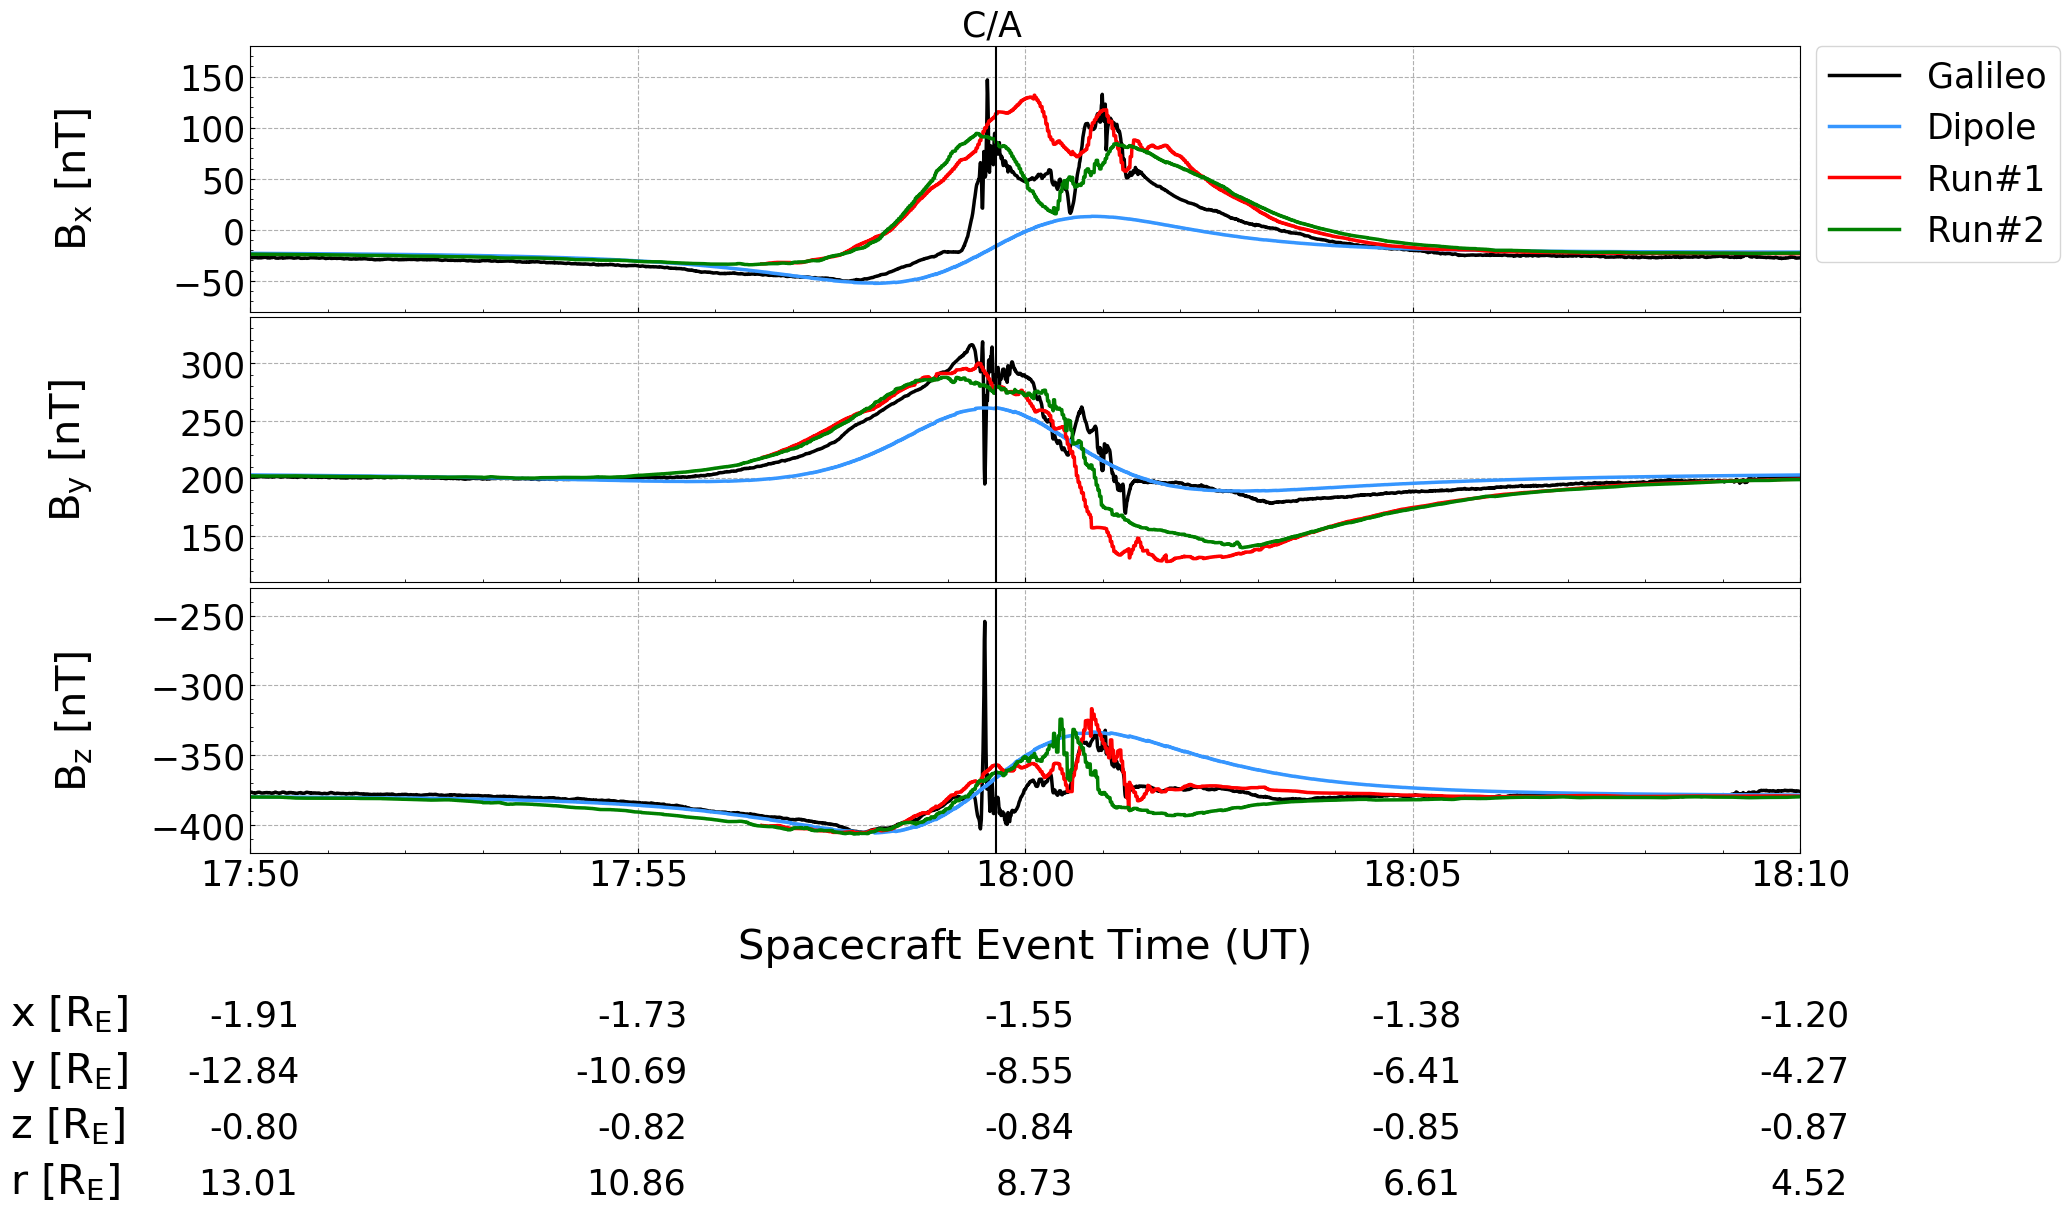

In [11]:
plotname="mag1.png"
#folder names for the simulation data
runn1="callistotoeuropa235"
runn2="callistotoeuropa247"
#line colors for the plot
galileocolor="black"
dipolecolor=(.212,0.59,1)#"blue"
run1color="red"
run2color="green"
run1name="Run#1"
run2name="Run#2"
plotcatpion=""
plotwidth1=2.5
plotwidth2=2.5

using PyPlot
#using Latex fonts
rc("font", family="sans-serif", weight="normal")

#loading spacecraft trajectory data
cd("$(homedir())/Desktop/Julia/flybys")
k="ORB26_EUR_EPHIO.TAB"
bfield=[-22,205,-379]
bmag=norm(bfield)
#reading file
a=readdlm(k,comments=true, comment_char='#')

#loading first simulation data
cd(@sprintf("/data1/europaplumes/%s/data/trajectories/",runn1))
aikef=readdlm("ORB26_B_TL052000.txt")
aikef=sortrows(aikef)

#second data set
cd(@sprintf("/data1/europaplumes/%s/data/trajectories/",runn2))
dipole=readdlm("ORB26_B_TL000000.txt")
dipole=sortrows(dipole)
aikef2=readdlm("ORB26_B_TL028000.txt")
aikef2=sortrows(aikef2)

#reading string and converting it into time data structure
#minute interval
interval=5
intervalstarth=17
intervalstartm=50
intervalendh=18
intervalendm=10
bstr=a[1,1]
time=intervalstartm
b=Array{String,1}(0) 
positions=Array{Int64,1}(0)
for i in 1:length(a[:,1])
    bstr=a[i,1]
    br=DateTime(bstr[12:16],Dates.DateFormat("H:M"))
    if (((Dates.hour(br)>=intervalstarth) && (Dates.minute(br)>=intervalstartm))||((Dates.hour(br)<=intervalendh) && (Dates.minute(br)<=intervalendm)))
        if (Dates.minute(br)%interval==0) && (time==Dates.minute(br))
            if Dates.minute(br)>=10
                push!(b,string(Dates.hour(br),":",Dates.minute(br)))
            else
                push!(b,string(Dates.hour(br),":0",Dates.minute(br)))
            end
            push!(positions,i)
            if time!=(60-interval)
                time+=interval
            else
                time=0
            end
        end
    end
end

#finding the closest approach of the spacecraft to the moon
r=zeros(length(a[:,1]))
min=norm([a[1,6],a[1,7],a[1,8]])
minpos=1
rightend=0
leftend=0
for i in 1:length(a[:,1])
    if a[i,6]>0 && norm([a[i,7],a[i,8]])<=1
        if leftend==0
            leftend=i
        end
        rightend=i
    end
    r[i]=norm([a[i,6],a[i,7],a[i,8]])
    if r[i]<min
        min=r[i]
        minpos=i
    end
end
minpos=minpos-(positions[1]-1)



#linreg fit to measured data
#x-2,y-3,z-4
for j in [2,3,4,5]
    correction=linreg(1:length(a[:,2]),a[:,j])
    dipolecorrection=linreg(1:length(dipole[:,2]),dipole[:,j+4])
    for l in 1:length(a[:,2])
        a[l,j]=a[l,j]-(correction[2]*l+correction[1])+(dipolecorrection[2]*l+dipolecorrection[1])*bmag
    end
end

#some plot attributes
ylabeloffset=50
xlabeloffset=25
ylabelsize=25
ticksize=25
labelssize=30
fig=figure(1,figsize=(20,14))


#Bx- the first subplot
subplot(411)
ax=gca()
#plotting all Bx components of the magnetic field
plot(a[positions[1]:positions[length(positions[:])],1],a[positions[1]:positions[length(positions[:])],2],linewidth=plotwidth1,color=galileocolor,label="Galileo")
plot(dipole[positions[1]:positions[length(positions[:])],1],dipole[positions[1]:positions[length(positions[:])],6]*bmag,linewidth=plotwidth1,color=dipolecolor,label="Dipole")
plot(aikef[positions[1]:8401,1],aikef[positions[1]:8401,6]*bmag,linewidth=plotwidth2,color=run1color,label=run1name)
plot(aikef2[positions[1]:positions[length(positions[:])],1],aikef2[positions[1]:positions[length(positions[:])],6]*bmag,linewidth=plotwidth2,color=run2color,label=run2name)
#y-range
ax[:set_ylim]([-80,180])
#we need to set the lims here!! or it will plot with an offset!
ax[:set_xlim]([0,positions[length(positions[:])]-(positions[1]-1)])
yticks(-50:50:150)
#custom x-ticks (according to the time interval we set earlier)
xticks(positions-(positions[1]-1),[],size=ticksize)
yticks(size=ticksize)
#additional plot formatting
ylabel(L"$\mathrm{B_x}$ [nT]",rotation=90,size=labelssize,labelpad=ylabeloffset)
ax[:grid]("True",linestyle="--")
ax[:yaxis][:set_minor_locator](matplotlib[:ticker][:AutoMinorLocator](5))
ax[:xaxis][:set_minor_locator](matplotlib[:ticker][:AutoMinorLocator](5))
ax[:tick_params](axis="both",which="both",direction="in")
ax[:yaxis][:set_label_coords](-0.1,0.5)
axvline(x=minpos,color="black")
axvspan(leftend,rightend,color="Gainsboro")
legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.,fontsize=ticksize)

#By-second subplot, same spiel as in Bx, just other data (y-components)
subplot(412)
ax=gca()
plot(a[positions[1]:positions[length(positions[:])],1],a[positions[1]:positions[length(positions[:])],3],linewidth=plotwidth1,color=galileocolor)
plot(dipole[positions[1]:positions[length(positions[:])],1],dipole[positions[1]:positions[length(positions[:])],7]*bmag,color=dipolecolor,linewidth=plotwidth1)
plot(aikef[positions[1]:8401,1],aikef[positions[1]:8401,7]*bmag,color=run1color,linewidth=plotwidth2)
plot(aikef2[positions[1]:positions[length(positions[:])],1],aikef2[positions[1]:positions[length(positions[:])],7]*bmag,color=run2color,linewidth=plotwidth2)
xticks(positions-(positions[1]-1),[],size=ticksize)
yticks(size=ticksize)
ax[:set_ylim]([110,340])
ax[:set_xlim]([0,positions[length(positions[:])]-(positions[1]-1)])
yticks(150:50:300)
ylabel(L"$\mathrm{B_y}$ [nT]",rotation=90,size=labelssize,labelpad=ylabeloffset)
ax[:grid]("True",linestyle="--")
ax[:yaxis][:set_minor_locator](matplotlib[:ticker][:AutoMinorLocator](5))
ax[:xaxis][:set_minor_locator](matplotlib[:ticker][:AutoMinorLocator](5))
ax[:yaxis][:set_label_coords](-0.1,0.5)
ax[:tick_params](axis="both",which="both",direction="in")
axvline(x=minpos,color="black")
axvspan(leftend,rightend,color="Gainsboro")

#Bz-last subplot, same spiel as before, again, other data (z-components)
subplot(413)
ax=gca()
plot(a[positions[1]:positions[length(positions[:])],1],a[positions[1]:positions[length(positions[:])],4],linewidth=plotwidth1,color=galileocolor)
plot(dipole[positions[1]:positions[length(positions[:])],1],dipole[positions[1]:positions[length(positions[:])],8]*bmag,color=dipolecolor,linewidth=plotwidth2)
plot(aikef[positions[1]:8401,1],aikef[positions[1]:8401,8]*bmag,color=run1color,linewidth=plotwidth2)
plot(aikef2[positions[1]:positions[length(positions[:])],1],aikef2[positions[1]:positions[length(positions[:])],8]*bmag,color=run2color,linewidth=plotwidth2)
xticks(positions-(positions[1]-1),b,size=ticksize)
yticks(size=ticksize)
ylabel(L"$\mathrm{B_z}$ [nT]",rotation=90,size=labelssize,labelpad=ylabeloffset)
ax[:set_ylim]([-420,-230])
ax[:set_xlim]([0,positions[length(positions[:])]-(positions[1]-1)])
yticks(-400:50:-250)
xlabel("Spacecraft Event Time (UT)",size=labelssize,labelpad=xlabeloffset)
ax[:grid]("True",linestyle="--")
ax[:yaxis][:set_minor_locator](matplotlib[:ticker][:AutoMinorLocator](5))
ax[:xaxis][:set_minor_locator](matplotlib[:ticker][:AutoMinorLocator](5))
ax[:tick_params](axis="both",which="both",direction="in")
ax[:yaxis][:set_label_coords](-0.1,0.5)
axvline(x=minpos,color="black")
axvspan(leftend,rightend,color="Gainsboro")

#custom labeling underneath the Bz plot
subplot(414)
axis("off")

#Table 
text(0.005, 0.18, L"x $\mathrm{[R_E]}$", fontsize=labelssize, transform=gcf()[:transFigure])
text(0.005, 0.14, L"y $\mathrm{[R_E]}$", fontsize=labelssize, transform=gcf()[:transFigure])
text(0.005, 0.10, L"z $\mathrm{[R_E]}$", fontsize=labelssize, transform=gcf()[:transFigure])
text(0.005, 0.06, L"r $\mathrm{[R_E]}$", fontsize=labelssize, transform=gcf()[:transFigure])

#seems like 0.898 is the right edge, 0.123 is aligned with the left
left=0.123
right=0.898

#calculating table ratio in plot ratio
ratio=(right-left)/length(a[positions[1]:positions[length(positions[:])],1])

#x coordinate for first value
beginning=0.11

#minusshift
minusshift=0.0055
digitshift=0.011

#reading strings and plotting them to the calculated locations
for i in positions-(positions[1]-1)
    shift=0.
    if abs(a[i,6])>=10
        shift=digitshift
    end
    if a[i,6]<0
        shift+=minusshift
    end
    text(beginning+i*ratio-shift, 0.18,@sprintf("%1.2f",a[i,6]), fontsize=ticksize, transform=gcf()[:transFigure])

    shift=0.
    if abs(a[i,7])>=10
        shift=digitshift
    end
    if a[i,7]<0
        shift+=minusshift
    end
    text(beginning+i*ratio-shift, 0.14,@sprintf("%1.2f",a[i,7]), fontsize=ticksize, transform=gcf()[:transFigure])

    shift=0.
    if abs(a[i,8])>=10
        shift=digitshift
    end
    if a[i,8]<0
        shift+=minusshift
    end
    text(beginning+i*ratio-shift, 0.10,@sprintf("%1.2f",a[i,8]), fontsize=ticksize, transform=gcf()[:transFigure])

    distance=norm([a[i,6],a[i,7],a[i,8]])
    shift=0.
    if abs(distance)>=10
        shift=digitshift
    end
    text(beginning+i*ratio-shift, 0.06,@sprintf("%1.2f",distance), fontsize=ticksize, transform=gcf()[:transFigure])
end
text(beginning+minpos*ratio-0.002, 0.887,"C/A", fontsize=ticksize, transform=gcf()[:transFigure])

text(0.49, 0.05,plotcatpion, fontsize=labelssize, transform=gcf()[:transFigure])

fig[:subplots_adjust](wspace=0,hspace=0.02)
savefig(plotname)